In [114]:
import seaborn as sns
import numpy as np
import pandas as pd
from feature_raster.Sensors.Landsat.Landsat8 import Landsat8

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [115]:
bogota_2018 = Landsat8(r"..\data\original\raster\real_datasets\2018\envelope_2018.img")

In [116]:
bogota_2018.dataframe.head()

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY
0,10196,9548,9030,8248,9860,9084,7848,2720
1,9380,8551,8141,7206,12198,8198,6831,2720
2,14890,15299,14510,15450,24745,20089,18142,2720
3,15649,16917,16839,17169,28183,25217,22646,2720
4,13237,14236,13343,13826,23020,19114,18368,2720


In [117]:
print(bogota_2018.meta)

{'driver': 'HFA', 'dtype': 'uint16', 'nodata': None, 'width': 826, 'height': 1425, 'count': 8, 'crs': CRS.from_dict(init='epsg:32618'), 'transform': Affine(30.0, 0.0, 585795.0,
       0.0, -30.0, 534525.0)}


In [118]:
bogota_2018.dataframe.shape

(1177050, 8)

with this you can use all pandas and seaborn, pyplot, etc features you need to perform analysis of
your data for example pairplots.


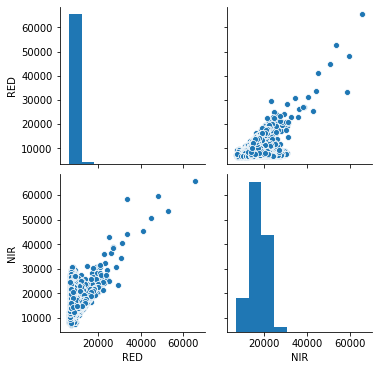

In [119]:
sns.pairplot(bogota_2018.dataframe.head(100000), vars=["RED", "NIR"])

Take into count that this image is big, with 1.1M+ rows, so some computings maybe a little bit slow, i tried to perform
a pairplot over the whole dataset and it took its time, but it is not really heavy due all of our columns
are integers, this is gonna change after feature engineering.


In [120]:
bogota_2018.dataframe.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177050 entries, 0 to 1177049
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype
---  ------   --------------    -----
 0   COASTAL  1177050 non-null  int64
 1   BLUE     1177050 non-null  int64
 2   GREEN    1177050 non-null  int64
 3   RED      1177050 non-null  int64
 4   NIR      1177050 non-null  int64
 5   SWIR1    1177050 non-null  int64
 6   SWIR2    1177050 non-null  int64
 7   QUALITY  1177050 non-null  int64
dtypes: int64(8)
memory usage: 71.8 MB


### PERFORMING FEATURE ENGINEERING

In [121]:
from FeatureRaster.Transformers.Landsat.Landsat8Transformer import Landsat8Transformer

In [122]:
transformer = Landsat8Transformer()

In [123]:
transformed_df = transformer.transform(bogota_2018)
transformed_df.head()

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_BRIGHTNESS,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI
0,10196,9548,9030,8248,9860,9084,7848,2720,0.089,9853.905,...,16327.469,-2909.674,-527.959,0.089,0.455,0.101,0.089,-0.041,-0.130,-0.003
1,9380,8551,8141,7206,12198,8198,6831,2720,0.257,12849.934,...,16395.342,-40.776,665.431,0.257,0.439,0.138,0.257,-0.196,-0.453,-0.003
2,14890,15299,14510,15450,24745,20089,18142,2720,0.231,25884.374,...,33273.171,55.759,-3371.915,0.231,0.531,-0.064,0.231,-0.104,-0.335,-0.161
3,15649,16917,16839,17169,28183,25217,22646,2720,0.243,29574.723,...,37994.745,203.568,-6504.747,0.243,0.510,-0.019,0.243,-0.056,-0.298,-0.199
4,13237,14236,13343,13826,23020,19114,18368,2720,0.250,24200.289,...,30927.951,153.475,-4285.743,0.250,0.518,-0.037,0.250,-0.093,-0.342,-0.178


In [124]:
columns = transformed_df.columns

In [125]:
from sklearn.preprocessing import MinMaxScaler


In [126]:
scaler = MinMaxScaler()

In [127]:
transformed_df = scaler.fit_transform(transformed_df)
transformed_df = pd.DataFrame(transformed_df, columns=columns)

In [128]:
transformed_df.head()

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_BRIGHTNESS,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI
0,0.033,0.033,0.039,0.035,0.066,0.057,0.036,0.000,0.347,0.072,...,0.039,0.609,0.770,0.347,0.487,0.618,0.347,0.474,0.606,0.684
1,0.019,0.016,0.024,0.017,0.105,0.042,0.019,0.000,0.552,0.121,...,0.040,0.676,0.788,0.552,0.461,0.648,0.552,0.318,0.398,0.683
2,0.118,0.132,0.132,0.156,0.316,0.241,0.208,0.000,0.520,0.335,...,0.199,0.678,0.727,0.520,0.614,0.484,0.520,0.411,0.474,0.513
3,0.132,0.160,0.172,0.185,0.373,0.326,0.284,0.000,0.534,0.396,...,0.244,0.682,0.680,0.534,0.578,0.520,0.534,0.459,0.498,0.472
4,0.088,0.114,0.113,0.129,0.287,0.224,0.212,0.000,0.542,0.308,...,0.177,0.681,0.713,0.542,0.591,0.506,0.542,0.422,0.470,0.495


That´s all you need to create all the posible indexes i have created for your landsat 8 image. Of course if you want
to save your image you are going to need to save this dataframe in the dataframe property of *bogota_2018*. I will work in
the feature of doing this automatically in the next version. For now, lets have some fun with the analysis of our image.

In [129]:
bogota_2018.dataframe = transformed_df
bogota_2018.dataframe.head()

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_BRIGHTNESS,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI
0,0.033,0.033,0.039,0.035,0.066,0.057,0.036,0.000,0.347,0.072,...,0.039,0.609,0.770,0.347,0.487,0.618,0.347,0.474,0.606,0.684
1,0.019,0.016,0.024,0.017,0.105,0.042,0.019,0.000,0.552,0.121,...,0.040,0.676,0.788,0.552,0.461,0.648,0.552,0.318,0.398,0.683
2,0.118,0.132,0.132,0.156,0.316,0.241,0.208,0.000,0.520,0.335,...,0.199,0.678,0.727,0.520,0.614,0.484,0.520,0.411,0.474,0.513
3,0.132,0.160,0.172,0.185,0.373,0.326,0.284,0.000,0.534,0.396,...,0.244,0.682,0.680,0.534,0.578,0.520,0.534,0.459,0.498,0.472
4,0.088,0.114,0.113,0.129,0.287,0.224,0.212,0.000,0.542,0.308,...,0.177,0.681,0.713,0.542,0.591,0.506,0.542,0.422,0.470,0.495


###### Memory usage after Feature Engineering
The process of feature engineering will increase you memory usage. You should be aware of this when you run your
processes.
The good part is that some indexes are highly correlated but we will work with them on feature selection.


In [130]:
transformed_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177050 entries, 0 to 1177049
Data columns (total 89 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   COASTAL              1177050 non-null  float64
 1   BLUE                 1177050 non-null  float64
 2   GREEN                1177050 non-null  float64
 3   RED                  1177050 non-null  float64
 4   NIR                  1177050 non-null  float64
 5   SWIR1                1177050 non-null  float64
 6   SWIR2                1177050 non-null  float64
 7   QUALITY              1177050 non-null  float64
 8   NDVI                 1177050 non-null  float64
 9   ATSAVI               1177050 non-null  float64
 10  AFRI1600             1177050 non-null  float64
 11  ALTERATION           1177050 non-null  float64
 12  AVI                  1177050 non-null  float64
 13  ARVI2                1177050 non-null  float64
 14  BWDRVI               1177050 non-null  float64
 15

In [131]:
# delete transformed_df to save some memory
del transformed_df

### READING A VECTORIAL FILE TO PANDAS
In this part we are going to use the 2018_binary_cobertures shapefile to predict the land cover. We would use geopandas
(geopandas rock) and nothing more. Its important that you be aware that you shouldn´t have polygons or points that
intersect, i haven´t create a feature to validate this as in this version i was worried about the analysis, so if you
 have intercepting or very close polygons be careful.

In [132]:
import geopandas as gpd


In [133]:
cobertures = gpd.read_file(r"..\data\original\vectorial\reals\2018_cobertures\binary\2018_binary_cobertures.shp")
cobertures.head()

,id,cobertura,cobertura_,geometry
0,1,1,1,"POLYGON ((600727.3225292085 504618.0127454922,..."
1,2,1,1,"POLYGON ((602970.040888233 508243.0237378108, ..."
2,3,1,1,"POLYGON ((601396.9582027118 509890.9260516567,..."
3,6,1,1,"POLYGON ((597987.0536418259 507064.6145917012,..."
4,8,1,1,"POLYGON ((589833.5846451713 511851.2003137566,..."


*cobertura_* its a binary land cover where 1 indicates buildings and 0 indicates no buildings.

In this case *cobertura* is a more specific land cover, it separates the coberture on: Buildings, Forest, Agricultural
soils, water and other land cover.

For this initial part of the analysis we are going to work with *cobertura_* as it will allow us to perform
some binary clasiffication algorithms that i have found dificult to encounter on GIS software.

BTW: If you find this classifiers on any GIS software let me now.


In [134]:
bogota_2018.coberture_to_pandas(cobertures, "cobertura_")


That´s it. Now lets see what we got.


In [135]:
bogota_2018.dataframe.head(5)

# TODO visualizar la imagen

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI,COBERTURE
0,0.033,0.033,0.039,0.035,0.066,0.057,0.036,0.000,0.347,0.072,...,0.609,0.770,0.347,0.487,0.618,0.347,0.474,0.606,0.684,-9999
1,0.019,0.016,0.024,0.017,0.105,0.042,0.019,0.000,0.552,0.121,...,0.676,0.788,0.552,0.461,0.648,0.552,0.318,0.398,0.683,-9999
2,0.118,0.132,0.132,0.156,0.316,0.241,0.208,0.000,0.520,0.335,...,0.678,0.727,0.520,0.614,0.484,0.520,0.411,0.474,0.513,-9999
3,0.132,0.160,0.172,0.185,0.373,0.326,0.284,0.000,0.534,0.396,...,0.682,0.680,0.534,0.578,0.520,0.534,0.459,0.498,0.472,-9999
4,0.088,0.114,0.113,0.129,0.287,0.224,0.212,0.000,0.542,0.308,...,0.681,0.713,0.542,0.591,0.506,0.542,0.422,0.470,0.495,-9999


wait what? *COBERTURE* has -9999 values? that should´n be good right?, actually it is. -9999 its the default for no data you can use
your own configuration there as coberture_to_pandas has a fillna attribute.
So What the fuck its going on here? its really simple. EXPLAIN with graphics


We will discard all of the rows where we have no data and perform our analysis only on the pixels where we have a known
coberture.

In [136]:
play_df = bogota_2018.select_df_of_cobertures()
play_df.head()

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI,COBERTURE
18789,0.021,0.021,0.032,0.030,0.155,0.072,0.044,0.000,0.616,0.176,...,0.709,0.780,0.616,0.501,0.600,0.616,0.310,0.358,0.604,0
18790,0.021,0.021,0.033,0.029,0.105,0.075,0.032,0.000,0.499,0.118,...,0.663,0.768,0.499,0.485,0.617,0.499,0.424,0.494,0.601,0
18791,0.021,0.020,0.030,0.030,0.099,0.075,0.032,0.000,0.478,0.111,...,0.657,0.765,0.478,0.504,0.597,0.478,0.440,0.515,0.590,0
18792,0.021,0.020,0.028,0.029,0.126,0.055,0.038,0.000,0.554,0.142,...,0.682,0.784,0.554,0.514,0.587,0.554,0.315,0.395,0.651,0
18793,0.020,0.020,0.031,0.027,0.123,0.053,0.032,0.000,0.556,0.140,...,0.681,0.786,0.556,0.489,0.614,0.556,0.316,0.394,0.664,0


And like the great Miranda Priesly used to say. That's all. Now we can play with scikit learn.

In [137]:
x = play_df.drop(["COBERTURE"], axis=1)
y = play_df["COBERTURE"].copy()
x.shape, y.shape


((2016, 89), (2016,))

### STRATIFIED DATA SPLITTING
This example is something nice because the amount of pixels of both land covers its unbalanced. Unbalanced
datasets are a challenge in ML and there are several methods for dealing with them, I am gonna use the most practical for
our scenario: `StatifiedShuffleSplit`.

If you don´t know what it does i will try to explain easily, `StratifiedShuffleSplit` does an stratified split of your
data (lol), but it is shuffle several times. Its almost always guaranteed that it will keep the same amount of values of the
target in both training and testing dataset.

You can accomplish something similar with `train_test_split` but i like to shuffle the dataset in order to mess things
a little bit.

In [138]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.20, random_state=0)


In [139]:
for train_index, test_index in sss.split(x, y):
    X_train_original, X_test_original = x.iloc[train_index], x.iloc[test_index]
    y_train_original, y_test_original = y.iloc[train_index], y.iloc[test_index]


In [140]:
y_test_original.shape


(404,)

In [141]:
porcentage_test = y_test_original.value_counts(normalize=True).to_frame()
porcentage_test

,COBERTURE
0,0.743
1,0.257


In [142]:
porcentage_train = y_train_original.value_counts(normalize=True).to_frame()
porcentage_train

,COBERTURE
0,0.742
1,0.258


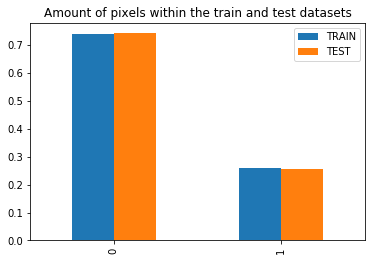

In [143]:
tmp = pd.concat([porcentage_train, porcentage_test], axis=1)
tmp.columns = ["TRAIN", "TEST"]
tmp.plot.bar(title="Amount of pixels within the train and test datasets")

### PERFORMING FEATURE SELECTION

Feature selection is the procces of selecting a subset of relevant features or predictors for use
in Machine Learning. This process is key in Machine learning and the impact in performance of a model
its really big.

for more info visit: [this site](https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e#:~:text=Feature%20Selection%20is%20the%20process,learn%20based%20on%20irrelevant%20features.)

**Important:** Again, sorry if i am been annoying but, if you want to reproduce this with a linear model you should
do a little more Feature Engineering

I would use 2 tecniques here for feature selection:
* Filter methods.
* Embeddeb methods.

#### Droping constant bands
The first one is gonna be made by the use of `VarianceThreshold` to drop constant features, this would tell us with features, have 0 standard
 deviation (you maybe thinking: Hector is really stupid that doesn´t happen often in S.I, and you are right, in both i am
 stupid and it doesnt happen that often, BUT, remember there is a feature named: `QUALITY`. Remember the library hopes you used this band in your stack.
 I will make and example with clouds as well, in the future. Actually the cloud problem was the one that gives me idea
 of the library)

In [144]:
from sklearn.feature_selection import VarianceThreshold


In [145]:
selection = VarianceThreshold(threshold=0)
selection.fit(X_train_original)



VarianceThreshold(threshold=0)

In [146]:
# now how many features we have to drop
sum(selection.get_support()), X_train_original.shape[1]

(89, 89)

In this case we don´t have to drop any column, but if your image is really good im sure the feature will say adieuuuu.

In [147]:
keep_feature = X_train_original.columns[selection.get_support()]
keep_feature

Index(['COASTAL', 'BLUE', 'GREEN', 'RED', 'NIR', 'SWIR1', 'SWIR2', 'QUALITY',
       'NDVI', 'ATSAVI', 'AFRI1600', 'ALTERATION', 'AVI', 'ARVI2', 'BWDRVI',
       'CIGREEN', 'CVI', 'CI', 'CTVI', 'CRI500', 'GDVI', 'DVIMSS', 'EVI',
       'EVI2', 'EVI22', 'FE2PLUS', 'FERRICOXIDES', 'FERROUS_IRON',
       'FERROUS_SILICATES', 'GEMI', 'GVMI', 'GOSSAN', 'GARI', 'GLI', 'GNDVI',
       'GOSAVI', 'GSAVI', 'GBNDVI', 'GRNDVI', 'HUE', 'INTENSITY', 'LATERITE',
       'LOGRATIO', 'MCRIG', 'MVI', 'MSRNIR_RED', 'NORM_R', 'NORM_NIR',
       'NORM_G', 'NLI', 'PPR', 'PVR', 'SIWSI', 'BDNVI', 'MNDVI', 'RI', 'NDSI',
       'NDVIC', 'PNDVI', 'RBNDVI', 'IF', 'TM5/TM7', 'BGI', 'SR550/670',
       'SR860/550', 'RDI', 'SRMIR/RED', 'GRVI', 'SRNIR/MIR', 'DVI', 'IO',
       'RGR', 'SSRED/NIR', 'SRSWIR1/NIR', 'SARVI2', 'SBL', 'SCI', 'SLAVI',
       'SQRT_NIR/NIR', 'TASSELED_BRIGHTNESS', 'TASSELED_VEGETATION',
       'TASSELED_WETNESS', 'TRANSFORMED_NDVI', 'TVI', 'VARIGREEN', 'WDRVI',
       'NDBI', 'BU', 'MNDWI'],
 

In [148]:
X_train = selection.transform(X_train_original)
X_test = selection.transform(X_test_original)


In [149]:
X_train = pd.DataFrame(X_train)
X_train.columns = keep_feature
X_test = pd.DataFrame(X_test)
X_test.columns = keep_feature

In [150]:
X_train.head()


,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_BRIGHTNESS,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI
0,0.007,0.004,0.007,0.008,0.054,0.037,0.018,0.000,0.433,0.064,...,0.017,0.642,0.768,0.433,0.502,0.605,0.433,0.441,0.540,0.632
1,0.066,0.067,0.083,0.089,0.115,0.130,0.114,0.000,0.305,0.117,...,0.090,0.579,0.736,0.305,0.550,0.547,0.305,0.542,0.673,0.607
2,0.011,0.009,0.016,0.013,0.134,0.064,0.027,0.000,0.648,0.156,...,0.046,0.715,0.776,0.648,0.478,0.630,0.648,0.325,0.351,0.572
3,0.018,0.019,0.026,0.030,0.129,0.085,0.046,0.000,0.558,0.145,...,0.054,0.687,0.762,0.557,0.531,0.569,0.558,0.397,0.446,0.546
4,0.012,0.011,0.022,0.016,0.177,0.082,0.035,0.000,0.720,0.204,...,0.063,0.753,0.776,0.720,0.468,0.638,0.720,0.298,0.295,0.536


### Correlation

In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

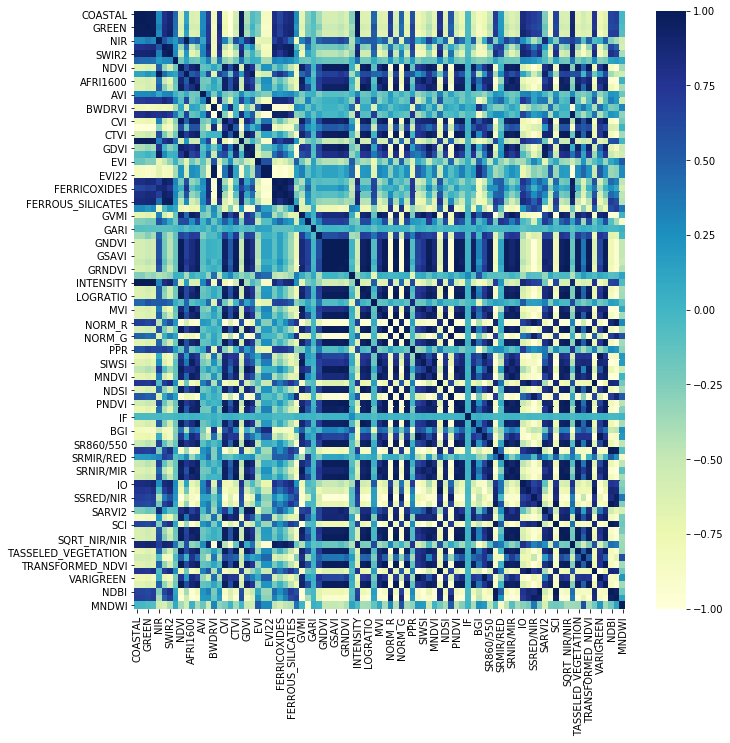

In [152]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat, cmap="YlGnBu")



In [153]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)

In [154]:
X_train_pca = pca.fit(X_train)


In [155]:
X_train_pca = pca.transform(X_train)


In [156]:
pca.explained_variance_ratio_

array([0.75439939, 0.12301491, 0.05918223, 0.03697163])

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [158]:
clf = RandomForestClassifier(random_state=42)
parameters = {"criterion": ("gini", "entropy"),
              "max_depth": (2, 3),
              "min_samples_split": (10, 20),
              "min_samples_leaf": (10, 20),
              "n_estimators": (1,100,200),
              "max_leaf_nodes": (5, 10, 15),
              }

In [159]:
grid = GridSearchCV(estimator=clf, param_grid=parameters, cv=sss, n_jobs=4, scoring="f1")

In [160]:
grid.fit(X_train_pca,y_train_original)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.2,
            train_size=None),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,...
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=

In [161]:
grid.best_estimator_


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [162]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 2,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 100}

In [163]:
grid.best_score_


0.9774429162215788

Well i'm not really happy with this particular RF as it seems to be overfitting the data, i would´nt use this RF
probably i should use a simpler algorithm to accomplish my task, but as this is a demostrative case, i would assume
we did a great job!



In [164]:
final_model = grid.best_estimator_

In [165]:
final_model.score(X_train_pca, y_train_original)


0.989454094292804

In [166]:
from sklearn.metrics import accuracy_score
y_pred = final_model.predict(X_train_pca)
accuracy_score(y_train_original, y_pred)


0.989454094292804

In [167]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_train_original, y_pred))

[[1180   16]
 [   1  415]]


In [168]:
X_test = pca.transform(X_test)



In [169]:
final_predictions = final_model.predict(X_test)
final_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [170]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_original, final_predictions))



[[294   6]
 [  1 103]]


In [171]:
final_probabilities = final_model.predict_proba(X_test)
final_probabilities



array([[0.92387606, 0.07612394],
       [0.97533322, 0.02466678],
       [0.86447941, 0.13552059],
       [0.99279359, 0.00720641],
       [0.99893485, 0.00106515],
       [0.99695267, 0.00304733],
       [0.99893485, 0.00106515],
       [0.99893485, 0.00106515],
       [0.99695267, 0.00304733],
       [0.99893485, 0.00106515],
       [0.99485729, 0.00514271],
       [0.99893485, 0.00106515],
       [0.84895399, 0.15104601],
       [0.98694267, 0.01305733],
       [0.99893485, 0.00106515],
       [0.13640618, 0.86359382],
       [0.97533322, 0.02466678],
       [0.23886139, 0.76113861],
       [0.92387606, 0.07612394],
       [0.99893485, 0.00106515],
       [0.85111667, 0.14888333],
       [0.16330159, 0.83669841],
       [0.86447941, 0.13552059],
       [0.16330159, 0.83669841],
       [0.99893485, 0.00106515],
       [0.86697465, 0.13302535],
       [0.12088076, 0.87911924],
       [0.90159594, 0.09840406],
       [0.12088076, 0.87911924],
       [0.12088076, 0.87911924],
       [0.

In [172]:
x_total_bogota = bogota_2018.dataframe.drop("COBERTURE", axis=1)
x_total_bogota

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_BRIGHTNESS,TASSELED_VEGETATION,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI
0,0.033,0.033,0.039,0.035,0.066,0.057,0.036,0.000,0.347,0.072,...,0.039,0.609,0.770,0.347,0.487,0.618,0.347,0.474,0.606,0.684
1,0.019,0.016,0.024,0.017,0.105,0.042,0.019,0.000,0.552,0.121,...,0.040,0.676,0.788,0.552,0.461,0.648,0.552,0.318,0.398,0.683
2,0.118,0.132,0.132,0.156,0.316,0.241,0.208,0.000,0.520,0.335,...,0.199,0.678,0.727,0.520,0.614,0.484,0.520,0.411,0.474,0.513
3,0.132,0.160,0.172,0.185,0.373,0.326,0.284,0.000,0.534,0.396,...,0.244,0.682,0.680,0.534,0.578,0.520,0.534,0.459,0.498,0.472
4,0.088,0.114,0.113,0.129,0.287,0.224,0.212,0.000,0.542,0.308,...,0.177,0.681,0.713,0.542,0.591,0.506,0.542,0.422,0.470,0.495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177045,0.025,0.025,0.037,0.040,0.141,0.118,0.067,0.000,0.544,0.157,...,0.066,0.684,0.741,0.544,0.531,0.567,0.544,0.458,0.492,0.494
1177046,0.024,0.024,0.036,0.039,0.141,0.116,0.064,0.000,0.550,0.158,...,0.065,0.686,0.744,0.550,0.528,0.570,0.550,0.451,0.484,0.498
1177047,0.024,0.024,0.035,0.039,0.132,0.115,0.067,0.000,0.529,0.147,...,0.062,0.676,0.740,0.529,0.531,0.568,0.529,0.468,0.506,0.498
1177048,0.025,0.026,0.035,0.042,0.116,0.114,0.069,0.000,0.475,0.128,...,0.058,0.657,0.736,0.475,0.548,0.550,0.475,0.503,0.557,0.498


In [173]:
x_total_bogota = pca.transform(x_total_bogota)

In [174]:
x_total_bogota

array([[-0.76028503, -0.21598403,  0.21097851,  0.02291384],
       [ 0.24471011, -0.21085448,  0.17467023,  0.10667045],
       [ 0.09681959,  0.25542454, -0.52816226, -0.04435249],
       ...,
       [ 0.10361998, -0.00890161, -0.17924269, -0.12907321],
       [-0.15419097, -0.02062156, -0.16345318, -0.14948279],
       [-0.08799579, -0.01323466, -0.17750527, -0.15022201]])

In [175]:
bogota_prediction = final_model.predict(x_total_bogota)
bogota_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [176]:
bogota_2018.dataframe["PREDICTION"] = bogota_prediction

In [177]:
bogota_2018.dataframe

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TASSELED_WETNESS,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI,COBERTURE,PREDICTION
0,0.033,0.033,0.039,0.035,0.066,0.057,0.036,0.000,0.347,0.072,...,0.770,0.347,0.487,0.618,0.347,0.474,0.606,0.684,-9999,1
1,0.019,0.016,0.024,0.017,0.105,0.042,0.019,0.000,0.552,0.121,...,0.788,0.552,0.461,0.648,0.552,0.318,0.398,0.683,-9999,0
2,0.118,0.132,0.132,0.156,0.316,0.241,0.208,0.000,0.520,0.335,...,0.727,0.520,0.614,0.484,0.520,0.411,0.474,0.513,-9999,0
3,0.132,0.160,0.172,0.185,0.373,0.326,0.284,0.000,0.534,0.396,...,0.680,0.534,0.578,0.520,0.534,0.459,0.498,0.472,-9999,0
4,0.088,0.114,0.113,0.129,0.287,0.224,0.212,0.000,0.542,0.308,...,0.713,0.542,0.591,0.506,0.542,0.422,0.470,0.495,-9999,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177045,0.025,0.025,0.037,0.040,0.141,0.118,0.067,0.000,0.544,0.157,...,0.741,0.544,0.531,0.567,0.544,0.458,0.492,0.494,-9999,0
1177046,0.024,0.024,0.036,0.039,0.141,0.116,0.064,0.000,0.550,0.158,...,0.744,0.550,0.528,0.570,0.550,0.451,0.484,0.498,-9999,0
1177047,0.024,0.024,0.035,0.039,0.132,0.115,0.067,0.000,0.529,0.147,...,0.740,0.529,0.531,0.568,0.529,0.468,0.506,0.498,-9999,0
1177048,0.025,0.026,0.035,0.042,0.116,0.114,0.069,0.000,0.475,0.128,...,0.736,0.475,0.548,0.550,0.475,0.503,0.557,0.498,-9999,0


In [178]:
bogota_probability = final_model.predict_proba(x_total_bogota)
bogota_probability

array([[0.45610444, 0.54389556],
       [0.99893485, 0.00106515],
       [0.88306219, 0.11693781],
       ...,
       [0.84895399, 0.15104601],
       [0.84895399, 0.15104601],
       [0.84895399, 0.15104601]])

In [179]:
bogota_probability_building = bogota_probability[:, 1]

In [180]:
bogota_2018.dataframe["BUILDING_PROBA"] = bogota_probability_building

In [181]:
bogota_2018.dataframe.head()

,COASTAL,BLUE,GREEN,RED,NIR,SWIR1,SWIR2,QUALITY,NDVI,ATSAVI,...,TRANSFORMED_NDVI,TVI,VARIGREEN,WDRVI,NDBI,BU,MNDWI,COBERTURE,PREDICTION,BUILDING_PROBA
0,0.033,0.033,0.039,0.035,0.066,0.057,0.036,0.000,0.347,0.072,...,0.347,0.487,0.618,0.347,0.474,0.606,0.684,-9999,1,0.544
1,0.019,0.016,0.024,0.017,0.105,0.042,0.019,0.000,0.552,0.121,...,0.552,0.461,0.648,0.552,0.318,0.398,0.683,-9999,0,0.001
2,0.118,0.132,0.132,0.156,0.316,0.241,0.208,0.000,0.520,0.335,...,0.520,0.614,0.484,0.520,0.411,0.474,0.513,-9999,0,0.117
3,0.132,0.160,0.172,0.185,0.373,0.326,0.284,0.000,0.534,0.396,...,0.534,0.578,0.520,0.534,0.459,0.498,0.472,-9999,0,0.144
4,0.088,0.114,0.113,0.129,0.287,0.224,0.212,0.000,0.542,0.308,...,0.542,0.591,0.506,0.542,0.422,0.470,0.495,-9999,0,0.144


In [182]:
bogota_2018.dataframe_to_raster("prueba.tiff")